# 1. Naive Bayes

The goal of this problem is to build naive Bayes (NB) models to classify the sentiment of tweets for US airline companies. 
The data used in this problem provide frequencies of words for individual tweets in addition to 'tweet_id', 'airline', 'airline_sentiment.'
'airline_sentiment' is the target variable, and the sentiment of tweets is one of 'negative', 'neutral', 'positive.'
The column names except for 'tweet_id', 'airline', and 'airline_sentiment' variables denote terms used in tweets. 

In [1]:
# packages and data import
# DO NOT CHANGE THIS PART
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split
%matplotlib inline

data = pd.read_csv('https://drive.google.com/uc?export=download&id=1_m5WSaXzgEzzr8glWgQB5y5utODAgqvs')
print(data.head())

X = data.drop(['tweet_id', 'airline', 'airline_sentiment'], axis=1)
y = data['airline_sentiment']

trnX,valX,trnY,valY=train_test_split(X,y,test_size=0.2,random_state=100, stratify=y)

             tweet_id         airline airline_sentiment  said  plus  \
0  570301083672813571  Virgin America           neutral     0     0   
1  570300767074181121  Virgin America          negative     0     0   
2  570300616901320704  Virgin America          positive     0     0   
3  570289584061480960  Virgin America          positive     1     0   
4  570287408438120448  Virgin America          positive     0     0   

   experience  today  mean  need  take  ...  maintenance  friend  twice  \
0           0      0     0     0     0  ...            0       0      0   
1           0      0     0     0     0  ...            0       0      0   
2           0      0     0     0     0  ...            0       0      0   
3           0      0     0     0     0  ...            0       0      0   
4           0      0     0     0     0  ...            0       0      0   

   rebooked  pick  airways  runway  phx  destinationdragons  fleek  
0         0     0        0       0    0              

## Part 1: Bernoulli NB
To build a Bernoulli NB, if a certain term is used in a tweet, the values of the variables are converted to 1; otherwise, they are converted to 0. 

1-(1) After the conversion, train a Bernoulli NB using training set (the converted trnX, trnY) (alpha=1). Prior probabilities of classes are proportional to ratios of classes in training set. Then, calculate the overall accuracy and accuracy values corresponding to each target class (sentiment) for the training and validation sets, respectively. 

In [8]:
# Convert the data to binary format
trnX_bin = (trnX > 0).astype(int)
valX_bin = (valX > 0).astype(int)

# Train a Bernoulli NB model
bnb = BernoulliNB(alpha=1, binarize=None, fit_prior=True)
bnb.fit(trnX_bin, trnY)

# Calculate the overall accuracy and accuracy values corresponding to each target class for the training set
trnY_pred = bnb.predict(trnX_bin)
trn_acc = np.mean(trnY_pred == trnY)
trn_acc_neg = np.mean((trnY_pred == 'negative') & (trnY == 'negative'))
trn_acc_neu = np.mean((trnY_pred == 'neutral') & (trnY == 'neutral'))
trn_acc_pos = np.mean((trnY_pred == 'positive') & (trnY == 'positive'))

# Calculate the overall accuracy and accuracy values corresponding to each target class for the validation set
valY_pred = bnb.predict(valX_bin)
val_acc = np.mean(valY_pred == valY)
val_acc_neg = np.mean((valY_pred == 'negative') & (valY == 'negative'))
val_acc_neu = np.mean((valY_pred == 'neutral') & (valY == 'neutral'))
val_acc_pos = np.mean((valY_pred == 'positive') & (valY == 'positive'))

# Print the results
print('Training accuracy: {:.4f}'.format(trn_acc))
print('Training accuracy for negative sentiment: {:.4f}'.format(trn_acc_neg))
print('Training accuracy for neutral sentiment: {:.4f}'.format(trn_acc_neu))
print('Training accuracy for positive sentiment: {:.4f}'.format(trn_acc_pos))
print('Validation accuracy: {:.4f}'.format(val_acc))
print('Validation accuracy for negative sentiment: {:.4f}'.format(val_acc_neg))
print('Validation accuracy for neutral sentiment: {:.4f}'.format(val_acc_neu))
print('Validation accuracy for positive sentiment: {:.4f}'.format(val_acc_pos))


Training accuracy: 0.8392
Training accuracy for negative sentiment: 0.6961
Training accuracy for neutral sentiment: 0.0700
Training accuracy for positive sentiment: 0.0730
Validation accuracy: 0.7968
Validation accuracy for negative sentiment: 0.6832
Validation accuracy for neutral sentiment: 0.0504
Validation accuracy for positive sentiment: 0.0632


1-(2) Find the top 10 most probable terms in each target according to the model trained in Question 1-(1) and summarize them with the probability of existence of terms in the following tables. 

In [9]:
# Get the feature probabilities for each sentiment class
neg_probs = bnb.feature_log_prob_[0, :]
neu_probs = bnb.feature_log_prob_[1, :]
pos_probs = bnb.feature_log_prob_[2, :]

# Get the indices of the top 10 features for each sentiment class
neg_idx = np.argsort(neg_probs)[::-1][:10]
neu_idx = np.argsort(neu_probs)[::-1][:10]
pos_idx = np.argsort(pos_probs)[::-1][:10]

# Get the feature names and their probabilities for each sentiment class
features = np.array(X.columns)
neg_terms = features[neg_idx]
neu_terms = features[neu_idx]
pos_terms = features[pos_idx]
neg_probs = np.exp(neg_probs[neg_idx])
neu_probs = np.exp(neu_probs[neu_idx])
pos_probs = np.exp(pos_probs[pos_idx])

# Print the results
print('Top 10 most probable terms for negative sentiment:')
for i in range(10):
    print('{:20s} {:.4f}'.format(neg_terms[i], neg_probs[i]))
print('\nTop 10 most probable terms for neutral sentiment:')
for i in range(10):
    print('{:20s} {:.4f}'.format(neu_terms[i], neu_probs[i]))
print('\nTop 10 most probable terms for positive sentiment:')
for i in range(10):
    print('{:20s} {:.4f}'.format(pos_terms[i], pos_probs[i]))


Top 10 most probable terms for negative sentiment:
reason               0.3389
sit                  0.1519
bag                  0.1412
family               0.1041
going                0.0871
agents               0.0834
fail                 0.0824
member               0.0808
supposed             0.0769
yes                  0.0761

Top 10 most probable terms for neutral sentiment:
reason               0.3017
soon                 0.1532
back                 0.1485
bag                  0.1406
missing              0.1137
going                0.1106
lga                  0.0964
pick                 0.0853
yes                  0.0837
forhours             0.0806

Top 10 most probable terms for positive sentiment:
ridiculous           0.2974
reason               0.2427
oh                   0.1661
baggage              0.1496
soon                 0.1387
back                 0.1332
bag                  0.1296
family               0.1241
fail                 0.0894
forhours             0.0839


1-(4) Find the top 10 terms whose probability of existence is high in positive (pos) tweets, but low in negative (neg) tweets according to the model trained in Question 1-(1). In addition, find the top 10 terms whose probability of existence is high in negative tweets, but low in positive tweets. 

In [16]:
pos_class_idx = np.where(bnb.classes_ == 'positive')[0][0]
neg_class_idx = np.where(bnb.classes_ == 'negative')[0][0]

log_prob_pos = bnb.coef_[pos_class_idx]
log_prob_neg = bnb.coef_[neg_class_idx]

log_ratios = log_prob_pos - log_prob_neg

sorted_terms = np.argsort(log_ratios)

# Top 10 terms with highest log ratios (i.e., most probable in positive class)
top_pos_terms = [X.columns[i] for i in sorted_terms[-10:][::-1]]
top_pos_prob = [np.exp(log_ratios[i]) for i in sorted_terms[-10:][::-1]]

# Top 10 terms with lowest log ratios (i.e., most probable in negative class)
top_neg_terms = [X.columns[i] for i in sorted_terms[:10]]
top_neg_prob = [np.exp(-log_ratios[i]) for i in sorted_terms[:10]]

print(top_pos_terms);
print(top_pos_prob);

print(top_neg_terms)
print(top_neg_prob)


['flying', 'online', 'good', 'oh', 'baggage', 'runway', 'broken', 'people', 'yesterday', 'ridiculous']
[32.89676746611054, 20.93430656934308, 18.250421111734997, 16.71071840184403, 13.004644990046454, 8.051656372824263, 7.7534468775344685, 7.388578789179906, 7.177476538060486, 6.85199190924281]
['rebooked', 'member', 'airport', 'long', 'iad', 'sorry', 'give', 'awful', 'update', 'working']
[17.339958158995813, 14.760460251046021, 13.900627615062756, 12.754184100418403, 10.461297071129701, 8.884937238493722, 8.168410041841002, 7.738493723849371, 7.59518828451883, 7.165271966527197]


## Part 2: Multinomial NB

2-(1) Train a multinomial NB using training set (trnX, trnY) (alpha=1). Prior probabilities of classes are proportional to ratios of classes in training set. Then calculate the overall accuracy and accuracy values corresponding to each target class (sentiment) for the training and validation sets, respectively. 

In [2]:
# create and fit the model on the training data
model = MultinomialNB(alpha=1)
model.fit(trnX, trnY)

# predict using the training and validation sets
trnPred = model.predict(trnX)
valPred = model.predict(valX)

# calculate the accuracies
trnAcc = np.mean(trnPred == trnY)
valAcc = np.mean(valPred == valY)

print("Training accuracy:", trnAcc)
print("Validation accuracy:", valAcc)
print("Training class-wise accuracy:")
print(pd.crosstab(trnY, trnPred, rownames=['True'], colnames=['Predicted'], normalize='index'))
print("Validation class-wise accuracy:")
print(pd.crosstab(valY, valPred, rownames=['True'], colnames=['Predicted'], normalize='index'))

Training accuracy: 0.8405681136227245
Validation accuracy: 0.7944
Training class-wise accuracy:
Predicted  negative   neutral  positive
True                                   
negative   0.908948  0.057561  0.033490
neutral    0.386688  0.562599  0.050713
positive   0.241758  0.075092  0.683150
Validation class-wise accuracy:
Predicted  negative   neutral  positive
True                                   
negative   0.890052  0.064921  0.045026
neutral    0.518987  0.405063  0.075949
positive   0.343066  0.080292  0.576642


2-(2) Find the top 20 most probable terms in each target according to the model trained in Question 2-(1) and summarize them with the probability of existence of terms in the following tables. 

In [3]:
# get the log probabilities of each term for each class
log_probs = model.feature_log_prob_

# get the top 20 most probable terms for each class and their probabilities
pos_terms = X.columns[np.argsort(log_probs[2])[::-1]][:20]
pos_probs = np.exp(np.sort(log_probs[2])[::-1][:20])

neut_terms = X.columns[np.argsort(log_probs[1])[::-1]][:20]
neut_probs = np.exp(np.sort(log_probs[1])[::-1][:20])

neg_terms = X.columns[np.argsort(log_probs[0])[::-1]][:20]
neg_probs = np.exp(np.sort(log_probs[0])[::-1][:20])

# create a table of the top terms and their probabilities
top_terms = pd.DataFrame({'Positive Terms': pos_terms, 'Positive Probability': pos_probs,
                          'Neutral Terms': neut_terms, 'Neutral Probability': neut_probs,
                          'Negative Terms': neg_terms, 'Negative Probability': neg_probs})

# display the table
print(top_terms)


   Positive Terms  Positive Probability Neutral Terms  Neutral Probability  \
0      ridiculous              0.037102        reason             0.043663   
1          reason              0.032906          soon             0.021832   
2              oh              0.021643          back             0.020479   
3         baggage              0.019655           bag             0.018934   
4            soon              0.017226       missing             0.014683   
5            back              0.016564         going             0.013910   
6             bag              0.016343           lga             0.012751   
7          family              0.015459           yes             0.011592   
8            fail              0.011042          pick             0.010819   
9             yes              0.010601      forhours             0.010240   
10       forhours              0.010601           sit             0.010046   
11         agents              0.010601    ridiculous           

2-(3) Find the top 10 terms whose probability of existence is high in positive (pos) tweets, but low in negative (neg) tweets according to the model trained in Question 2-(1). In addition, find the top 10 terms whose probability of existence is high in negative tweets, but low in positive tweets. 

In [6]:
# get the feature names
feature_names = X.columns.tolist()

# get the probabilities for each class
probs = np.exp(model.feature_log_prob_)

# get the index of the 'positive' and 'negative' sentiments
pos_idx = np.where(model.classes_ == 'positive')[0][0]
neg_idx = np.where(model.classes_ == 'negative')[0][0]

# get the probabilities of each feature for the 'positive' sentiment and the 'negative' sentiment
pos_probs = probs[pos_idx]
neg_probs = probs[neg_idx]

# get the indices of the top 10 terms with high probability in 'positive' tweets but low in 'negative' tweets
pos_top_indices = np.argsort(pos_probs)[-10:][::-1]
neg_low_indices = np.argsort(neg_probs)[:10]

# get the indices of the top 10 terms with high probability in 'negative' tweets but low in 'positive' tweets
neg_top_indices = np.argsort(neg_probs)[-10:][::-1]
pos_low_indices = np.argsort(pos_probs)[:10]

# print the top 10 terms with high probability in 'positive' tweets but low in 'negative' tweets
print('Top 10 terms with high probability in positive tweets but low in negative tweets:')
for i in pos_top_indices:
    if i in neg_low_indices:
        print(f'{feature_names[i]}: {pos_probs[i]} (also high in negative tweets)')
    else:
        print(f'{feature_names[i]}: {pos_probs[i]}')

print()

# print the top 10 terms with high probability in 'negative' tweets but low in 'positive' tweets
print('Top 10 terms with high probability in negative tweets but low in positive tweets:')
for i in neg_top_indices:
    if i in pos_low_indices:
        print(f'{feature_names[i]}: {neg_probs[i]} (also high in positive tweets)')
    else:
        print(f'{feature_names[i]}: {neg_probs[i]}')

Top 10 terms with high probability in positive tweets but low in negative tweets:
ridiculous: 0.037102473498233195
reason: 0.03290636042402826
oh: 0.02164310954063604
baggage: 0.019655477031802107
soon: 0.017226148409893983
back: 0.016563604240282675
bag: 0.016342756183745585
family: 0.015459363957597172
fail: 0.011042402826855122
yes: 0.010600706713780913

Top 10 terms with high probability in negative tweets but low in positive tweets:
reason: 0.05177021810142869
sit: 0.020292341703236867
bag: 0.018774540535189888
family: 0.013660210512422869
going: 0.011383508760352398
agents: 0.01131751740521991
fail: 0.010723595209027614
member: 0.010624608176328902
yes: 0.01059161249876266
supposed: 0.00993169894743788


# 2. Decision tree

In this question, you have to train decision tree models to classify the quality level of different red wines. The quality level of red wines is one of low(0), medium(1), and high(2). The explanatory variables are as follows:
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol


In [7]:
# packages and data import
# DO NOT CHANGE THIS PART
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('https://drive.google.com/uc?export=download&id=1ECpejgarOgstSazQCzsQOiPW_uLVxLJL')

X = data.drop(['quality'],axis=1)
y = data['quality']

trnX,valX,trnY,valY=train_test_split(X,y,test_size=0.2,random_state=555, stratify=y)

(1) Train decision tree models by different maximum depth (1, 2, 3, 4, 5) with min_samples_leaf = 10 and the Gini impurity for the criterion to determine the best split, using a training set (trnX, trnY). Then, calculate the accuracy of the models using a validation set (valX, valY) for overall samples and individual classes, and fill the following table. 

In [7]:
# train decision tree models and calculate accuracy for different max_depth values
max_depths = [1, 2, 3, 4, 5]
min_samples_leaf = 10
criterion = 'gini'

overall_acc = []
class0_acc = []
class1_acc = []
class2_acc = []

for depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=min_samples_leaf, criterion=criterion, random_state=555)
    clf.fit(trnX, trnY)
    y_pred = clf.predict(valX)
    overall_acc.append(round(clf.score(valX, valY), 4))
    class0_acc.append(round(clf.score(valX[valY==0], valY[valY==0]), 4))
    class1_acc.append(round(clf.score(valX[valY==1], valY[valY==1]), 4))
    class2_acc.append(round(clf.score(valX[valY==2], valY[valY==2]), 4))
    
# print the table
print('| Max Depth | Overall Accuracy | low(0) Accuracy | medium(1) Accuracy | high(2) Accuracy |')
print('|-----------|-----------------|-----------------|-----------------|-----------------|')
for i in range(len(max_depths)):
    print(f'|     {max_depths[i]}     |       {overall_acc[i]}      |       {class0_acc[i]}      |       {class1_acc[i]}      |       {class2_acc[i]}      |')

| Max Depth | Overall Accuracy | low(0) Accuracy | medium(1) Accuracy | high(2) Accuracy |
|-----------|-----------------|-----------------|-----------------|-----------------|
|     1     |       0.5688      |       0.5973      |       0.7266      |       0.0      |
|     2     |       0.5281      |       0.8255      |       0.3594      |       0.0      |
|     3     |       0.5969      |       0.8188      |       0.3984      |       0.4186      |
|     4     |       0.6438      |       0.7383      |       0.625      |       0.3721      |
|     5     |       0.6188      |       0.7114      |       0.5938      |       0.3721      |


(3) Draw the trained tree with feature names when the maximum depth is set to 3. 

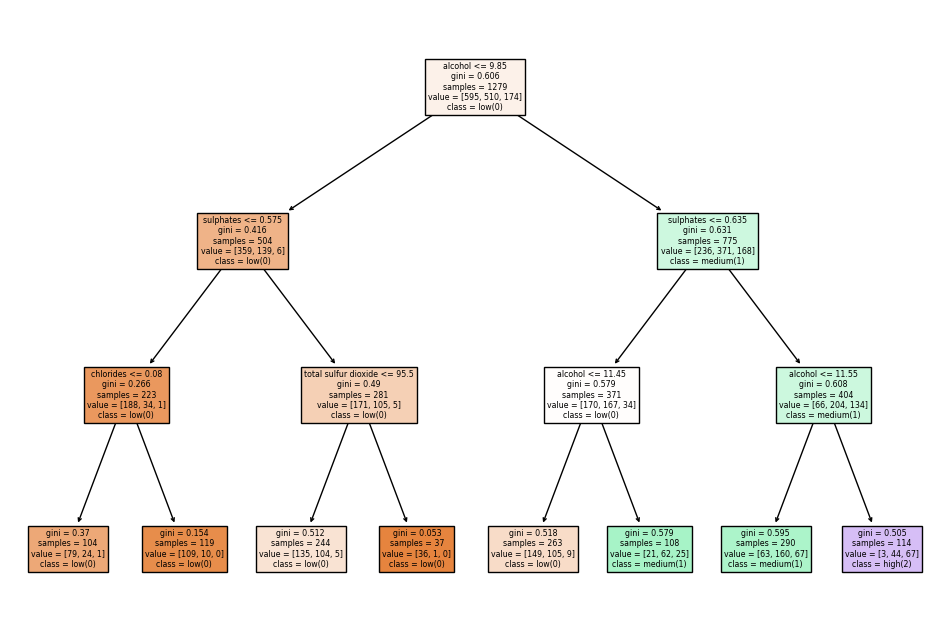

In [6]:
clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=min_samples_leaf, criterion=criterion, random_state=555)
clf.fit(trnX, trnY)

plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=X.columns, class_names=['low(0)', 'medium(1)', 'high(2)'], filled=True)
plt.show()

(6) Convert the target variable to have two classes by combining the medium and high classes into one classes. Then, train decision tree models by different maximum depth (1, 2, 3, 4, 5) with min_samples_leaf = 10 and the gini impurity for the criterion to determine the best split, using a training set (trnX, trnY). Then, calculate the accuracy of the models using a validation set (valX, valY) for overall samples and individual classes, and fill the following table. 

In [8]:
X = data.drop(['quality'], axis=1)
y = data['quality']

trnX, valX, trnY, valY = train_test_split(X, y, test_size=0.2, random_state=555, stratify=y)

# Convert the target variable to have two classes by combining medium and high into one class
trnY_binary = trnY.replace({1: 0, 2: 1})
valY_binary = valY.replace({1: 0, 2: 1})

# Table for storing accuracy results
results = {'Max Depth': [], 'Accuracy (Overall)': [], 'Accuracy (Low)': [], 'Accuracy (Medium/High)': []}

# Train decision tree models with different maximum depths and evaluate accuracies
max_depths = [1, 2, 3, 4, 5]
min_samples_leaf = 10

for max_depth in max_depths:
    # Train the decision tree model
    clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, criterion='gini', random_state=555)
    clf.fit(trnX, trnY_binary)
    
    # Make predictions on the validation set
    valY_pred = clf.predict(valX)
    
    # Calculate accuracy scores
    accuracy_overall = np.mean(valY_binary == valY_pred)
    accuracy_low = np.mean(valY_binary[valY == 0] == valY_pred[valY == 0])
    accuracy_medium_high = np.mean(valY_binary[valY != 0] == valY_pred[valY != 0])
    
    # Store the results in the table
    results['Max Depth'].append(max_depth)
    results['Accuracy (Overall)'].append(accuracy_overall)
    results['Accuracy (Low)'].append(accuracy_low)
    results['Accuracy (Medium/High)'].append(accuracy_medium_high)

# Display the results table
results_df = pd.DataFrame(results)
print(results_df)

   Max Depth  Accuracy (Overall)  Accuracy (Low)  Accuracy (Medium/High)
0          1            0.865625        1.000000                0.748538
1          2            0.875000        1.000000                0.766082
2          3            0.878125        1.000000                0.771930
3          4            0.890625        0.993289                0.801170
4          5            0.884375        0.979866                0.801170


(7) Compare the two tree models of maximum depth 1 and 2 obtained for Question (6). 

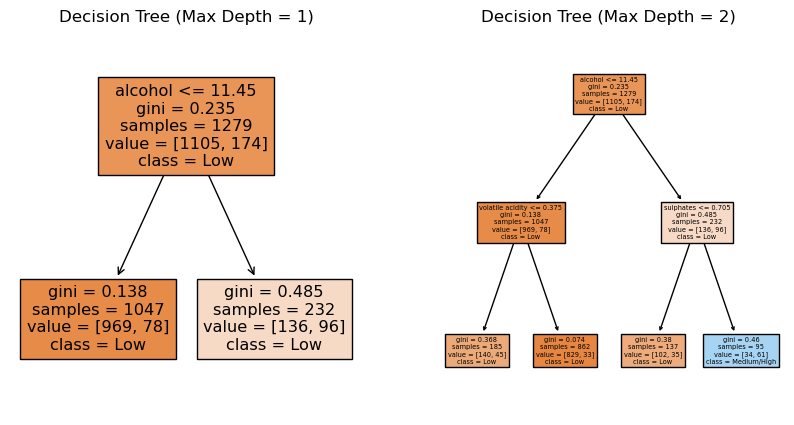

In [9]:
X = data.drop(['quality'], axis=1)
y = data['quality']

trnX, valX, trnY, valY = train_test_split(X, y, test_size=0.2, random_state=555, stratify=y)

# Convert the target variable to have two classes by combining medium and high into one class
trnY_binary = trnY.replace({1: 0, 2: 1})
valY_binary = valY.replace({1: 0, 2: 1})

# Train decision tree models with different maximum depths and evaluate accuracies
max_depths = [1, 2]
min_samples_leaf = 10

results = {}

for max_depth in max_depths:
    # Train the decision tree model
    clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, criterion='gini', random_state=555)
    clf.fit(trnX, trnY_binary)
    
    # Store the decision tree model
    results[max_depth] = clf
    
# Visualize decision trees
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plot_tree(results[1], feature_names=X.columns, class_names=['Low', 'Medium/High'], filled=True)
plt.title('Decision Tree (Max Depth = 1)')
plt.subplot(1, 2, 2)
plot_tree(results[2], feature_names=X.columns, class_names=['Low', 'Medium/High'], filled=True)
plt.title('Decision Tree (Max Depth = 2)')
plt.show()

## 3 $k$-means clustering
This problem uses the data generated from 4 normal distributions for applying $k$-means clustering. 
'y’ variable denotes which normal distribution generates individual samples.
k-means implemented in sci-kit learn can assign initial centeroids through ‘init’. When init is set as $c$ by $p$ array ($c$ = the number of clusters, $p$ = the number of features), each row is used as a centroid.

In [11]:
# packages and data import
# DO NOT CHANGE THIS PART
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

X,y=datasets.make_blobs(n_samples=500, n_features=2, cluster_std=1, random_state=68, centers=4)

(1) Select randomly 4 samples from the given data set and use them as initial centroids. This procedure is repeated for 100 times. Then, calculate the average values of the silhouette coefficient and adjusted rand index values for 100 iterations. 

In [14]:
X, y = datasets.make_blobs(n_samples=500, n_features=2, cluster_std=1, random_state=68, centers=4)

num_iterations = 100
silhouette_scores = []
adjusted_rand_scores = []

for _ in range(num_iterations):
    # Randomly select 4 samples as initial centroids
    centroid_indices = np.random.choice(X.shape[0], 4, replace=False)
    initial_centroids = X[centroid_indices]

    # Perform k-means clustering
    kmeans = KMeans(n_clusters=4, init=initial_centroids, n_init=1)
    kmeans.fit(X)
    labels = kmeans.labels_

    # Calculate silhouette coefficient and adjusted Rand index
    silhouette_scores.append(silhouette_score(X, labels))
    adjusted_rand_scores.append(adjusted_rand_score(y, labels))

# Calculate the average values
average_silhouette = np.mean(silhouette_scores)
average_adjusted_rand = np.mean(adjusted_rand_scores)

print("Average Silhouette Coefficient:", average_silhouette)
print("Average Adjusted Rand Index:", average_adjusted_rand)

Average Silhouette Coefficient: 0.5599487784108144
Average Adjusted Rand Index: 0.8591951523698793


(2) Select randomly one sample from each normal distribution and use them as initial centroids. This procedure is repeated for 100 times. Then, calculate the average values of the silhouette coefficient and adjusted rand index values for 100 iterations. 

In [15]:
for _ in range(num_iterations):
    centroids = []
    for label in range(4):
        # Randomly select one sample from each normal distribution
        samples = X[y == label]
        centroid_index = np.random.choice(range(samples.shape[0]), size=1)
        centroid = samples[centroid_index]
        centroids.append(centroid)

    initial_centroids = np.concatenate(centroids, axis=0)

    # Perform k-means clustering
    kmeans = KMeans(n_clusters=4, init=initial_centroids, n_init=1)
    kmeans.fit(X)
    labels = kmeans.labels_

    # Calculate silhouette coefficient and adjusted Rand index
    silhouette_scores.append(silhouette_score(X, labels))
    adjusted_rand_scores.append(adjusted_rand_score(y, labels))

# Calculate the average values
average_silhouette = np.mean(silhouette_scores)
average_adjusted_rand = np.mean(adjusted_rand_scores)

print("Average Silhouette Coefficient:", average_silhouette)
print("Average Adjusted Rand Index:", average_adjusted_rand)


Average Silhouette Coefficient: 0.5764008956976995
Average Adjusted Rand Index: 0.8998237714263435


(3) Draw scatter plots for the given data with initial centroids and final centroids for the worst cases among 100 trials in Question (1) in terms of silhouette coefficient and adjusted rand index, respectively. The initial centroids should be marked as red ‘X’ and the final centroids should be marked as blue ‘X’. 

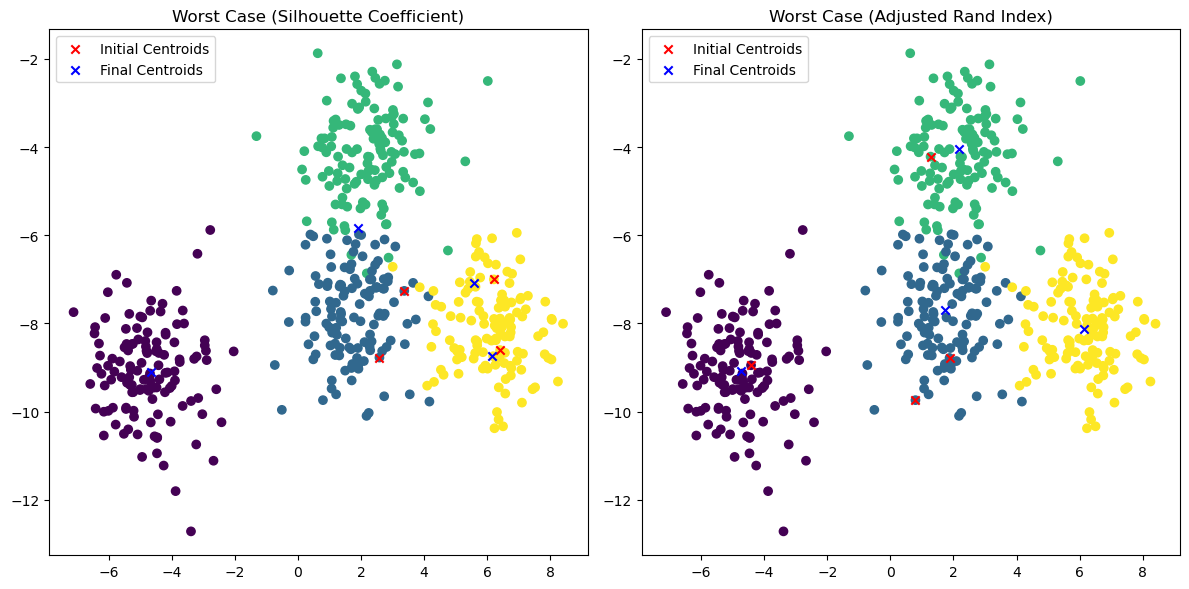

In [20]:
worst_silhouette_index = np.argmin(silhouette_scores)
worst_adjusted_rand_index = np.argmin(adjusted_rand_scores)

worst_silhouette_centroids = X[np.random.choice(X.shape[0], 4, replace=False)]
worst_adjusted_rand_centroids = X[np.random.choice(X.shape[0], 4, replace=False)]

plt.figure(figsize=(12, 6))

# Plotting the worst case based on silhouette coefficient
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.scatter(worst_silhouette_centroids[:, 0], worst_silhouette_centroids[:, 1], marker='x', c='red', label='Initial Centroids')
kmeans_silhouette = KMeans(n_clusters=4, init=worst_silhouette_centroids, n_init=1)
kmeans_silhouette.fit(X)
plt.scatter(kmeans_silhouette.cluster_centers_[:, 0], kmeans_silhouette.cluster_centers_[:, 1], marker='x', c='blue', label='Final Centroids')
plt.title('Worst Case (Silhouette Coefficient)')
plt.legend()

# Plotting the worst case based on adjusted Rand index
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.scatter(worst_adjusted_rand_centroids[:, 0], worst_adjusted_rand_centroids[:, 1], marker='x', c='red', label='Initial Centroids')
kmeans_adjusted_rand = KMeans(n_clusters=4, init=worst_adjusted_rand_centroids, n_init=1)
kmeans_adjusted_rand.fit(X)
plt.scatter(kmeans_adjusted_rand.cluster_centers_[:, 0], kmeans_adjusted_rand.cluster_centers_[:, 1], marker='x', c='blue', label='Final Centroids')
plt.title('Worst Case (Adjusted Rand Index)')
plt.legend()

plt.tight_layout()
plt.show()


(4) Draw scatter plots for the worst case of Question (2) in the same way as in Question (3).  

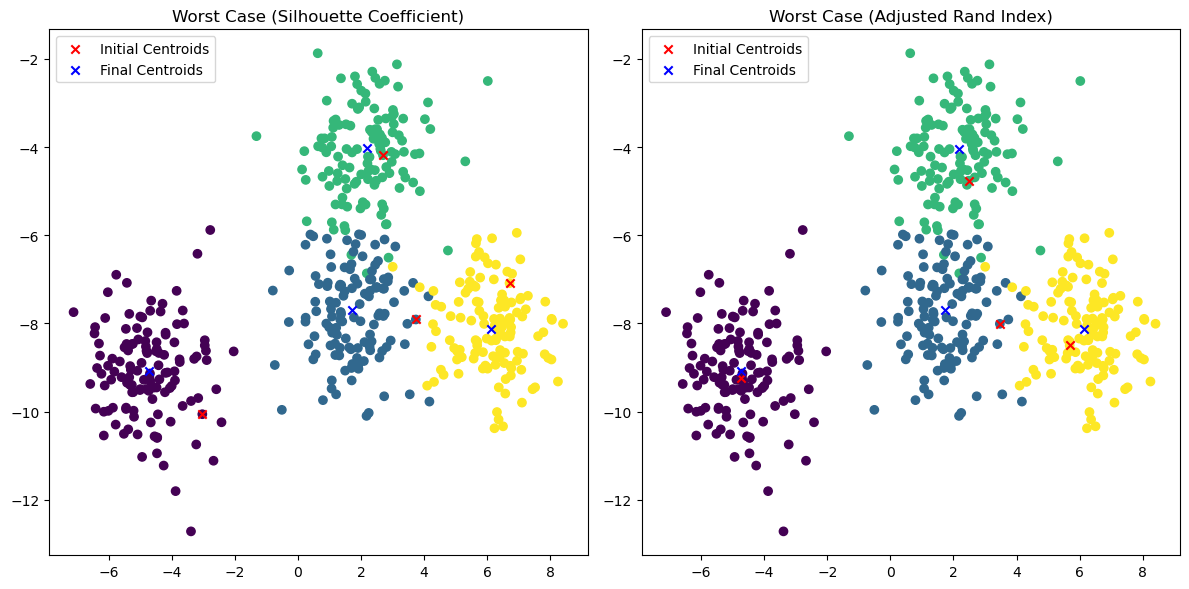

In [22]:
worst_silhouette_index = np.argmin(silhouette_scores)
worst_adjusted_rand_index = np.argmin(adjusted_rand_scores)

worst_silhouette_centroids = np.concatenate([X[np.random.choice(np.where(y==i)[0], size=1)] for i in range(4)], axis=0)
worst_adjusted_rand_centroids = np.concatenate([X[np.random.choice(np.where(y==i)[0], size=1)] for i in range(4)], axis=0)

plt.figure(figsize=(12, 6))

# Plotting the worst case based on silhouette coefficient
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.scatter(worst_silhouette_centroids[:, 0], worst_silhouette_centroids[:, 1], marker='x', c='red', label='Initial Centroids')
kmeans_silhouette = KMeans(n_clusters=4, init=worst_silhouette_centroids, n_init=1)
kmeans_silhouette.fit(X)
plt.scatter(kmeans_silhouette.cluster_centers_[:, 0], kmeans_silhouette.cluster_centers_[:, 1], marker='x', c='blue', label='Final Centroids')
plt.title('Worst Case (Silhouette Coefficient)')
plt.legend()

# Plotting the worst case based on adjusted Rand index
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.scatter(worst_adjusted_rand_centroids[:, 0], worst_adjusted_rand_centroids[:, 1], marker='x', c='red', label='Initial Centroids')
kmeans_adjusted_rand = KMeans(n_clusters=4, init=worst_adjusted_rand_centroids, n_init=1)
kmeans_adjusted_rand.fit(X)
plt.scatter(kmeans_adjusted_rand.cluster_centers_[:, 0], kmeans_adjusted_rand.cluster_centers_[:, 1], marker='x', c='blue', label='Final Centroids')
plt.title('Worst Case (Adjusted Rand Index)')
plt.legend()

plt.tight_layout()
plt.show()
